In [ ]:
!pip install pyspark

In [ ]:
#spark context  is the entry point for spark environment
#spark conf to run a spark application on the local/cluster

In [2]:
import time
import csv
import matplotlib.pyplot as plt
from pyspark import SparkContext, SparkConf

# Define the search term
search_term = 'Cure'

# Read the list of movies from a CSV file
movies = []
with open('tmdb_5000_credits.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        movies.append(row[0])

# Measure the execution time of the PySpark method
start_time_spark = time.time()
conf = SparkConf().setAppName("films").setMaster("local[2]")
sc = SparkContext.getOrCreate(conf=conf)
rdd = sc.parallelize(movies)
result_spark = rdd.filter(lambda movie: movie == search_term).collect()
end_time_spark = time.time()


# Print the results and the execution times
print("PySpark method:")

print("Execution time:", end_time_spark - start_time_spark)




23/05/16 15:27:32 WARN Utils: Your hostname, osama-Vostro-14-3468 resolves to a loopback address: 127.0.1.1; using 172.17.0.1 instead (on interface docker0)
23/05/16 15:27:32 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/05/16 15:27:33 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


PySpark method:
Execution time: 5.645969867706299


For cluster-1:
Execution time: 0.1772298812866211
For Cluster-2:
Execution time: 0.1863856315612793


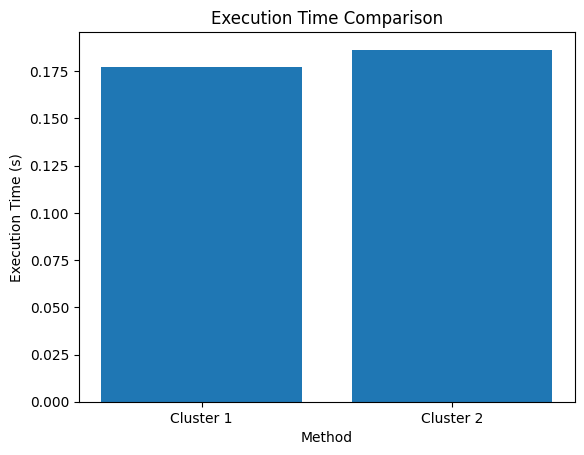

In [3]:
import time
import csv
import matplotlib.pyplot as plt

# Define the search term
search_term = 'Cure'

# Read the list of movies from a CSV file
movies = []
with open('tmdb_5000_credits.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        movies.append(row[0])

# Measure the execution time of the PySpark method
start_time_spark = time.time()
conf = SparkConf().setAppName("films").setMaster("local[1]")
sc = SparkContext.getOrCreate(conf=conf)
rdd = sc.parallelize(movies)
result_spark = rdd.filter(lambda movie: movie == search_term).collect()
end_time_spark = time.time()

# Measure the execution time of the non-PySpark method
start_time_2_spark = time.time()
conf = SparkConf().setAppName("films").setMaster("local[3]")
sc = SparkContext.getOrCreate(conf=conf)
rdd = sc.parallelize(movies)
result_2_spark = rdd.filter(lambda movie: movie == search_term).collect()
end_time_2_spark = time.time()

# Print the results and the execution times
print("For cluster-1:")
print("Execution time:", end_time_spark - start_time_spark)

print("For Cluster-2:")
print("Execution time:", end_time_2_spark - start_time_2_spark)

# Plot the results on a bar chart
execution_times = [end_time_spark - start_time_spark, end_time_2_spark - start_time_2_spark]
labels = ['Cluster 1', 'Cluster 2']
plt.bar(labels, execution_times)
plt.title('Execution Time Comparison')
plt.xlabel('Method')
plt.ylabel('Execution Time (s)')
plt.show()
